In [81]:
# This file is aimed to add Xe to the model and see if the model can be improved
from src.DataPrepocessing import *
from src.NeuralNets import *
from src.TrainMethod import *

import matplotlib.pyplot as plt
import torch.optim as optim
import torch.nn as nn
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Data Propocessing

This part will generate a file with following parts
* Keff
* Power
* Threshold
* Histogramed Cs
* Histogramed Xe

In [82]:
core_name = 'cycle_352.csv' 
Gamma_name = "Quantile_1_cycle_32_bins_10.csv"


output_name = 'Gamma_quantile_1_offset_35.csv'

offset = 35
shuffle = False

In [83]:
# First, get the keff power and threshold from tracked_results.csv

core_file = pd.read_csv(f"./Gamma Data/{core_name}")
core_file.shape

(353, 13)

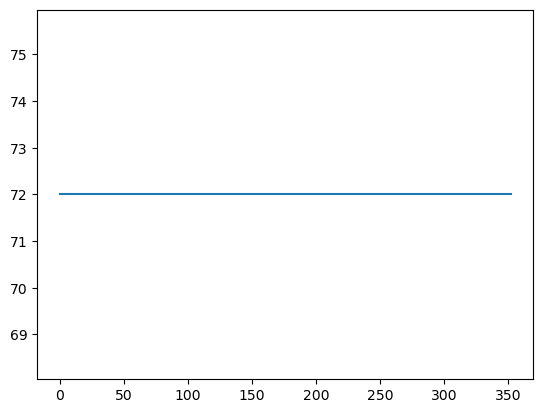

In [84]:
extract_columns = ["keff", "power_normalization_value", "threshold_fuel"]
core_data = core_file[extract_columns].to_numpy()
core_data.shape
import matplotlib.pyplot as plt
plt.plot(core_data[:,2])

In [85]:
Gamma_data = pd.read_csv(f"./Gamma Data/{Gamma_name}").to_numpy()

In [86]:
Gamma_data.shape

(252, 592)

In [87]:
# do the time align
# although it does not have a clear effect on the result






core_data = core_data[101+offset:]

Gamma_data = Gamma_data[:-offset]

In [88]:

total_data = np.concatenate((core_data, Gamma_data), axis=1)
total_data.shape

(217, 595)

In [89]:
# check if the first column is the keff

total_data[:,0]

array([1.01743509, 1.01713028, 1.0156789 , 1.01474924, 1.01404446,
       1.01292956, 1.01387516, 1.01299734, 1.01283018, 1.01293717,
       1.01094055, 1.01196693, 1.01135645, 1.01010691, 1.01184741,
       1.0106646 , 1.01005645, 1.00958495, 1.00932185, 1.00872624,
       1.01020498, 1.00997746, 1.00915425, 1.00974644, 1.01024998,
       1.00965676, 1.01104921, 1.01211323, 1.01249665, 1.01285302,
       1.0129773 , 1.01342688, 1.0151508 , 1.01535313, 1.01680347,
       1.015169  , 1.01492441, 1.01638743, 1.01672471, 1.01622057,
       1.01820432, 1.01858834, 1.01783564, 1.01773985, 1.01809358,
       1.01772942, 1.02029024, 1.01900115, 1.01844429, 1.01714863,
       1.01754683, 1.01798599, 1.0181876 , 1.01746807, 1.01683225,
       1.01638127, 1.01542111, 1.01436612, 1.01405498, 1.01378128,
       1.01468394, 1.01539393, 1.0154219 , 1.01419544, 1.01428878,
       1.01368572, 1.01318006, 1.01377313, 1.01207711, 1.01274299,
       1.01216708, 1.01119709, 1.0111595 , 1.01051823, 1.01046

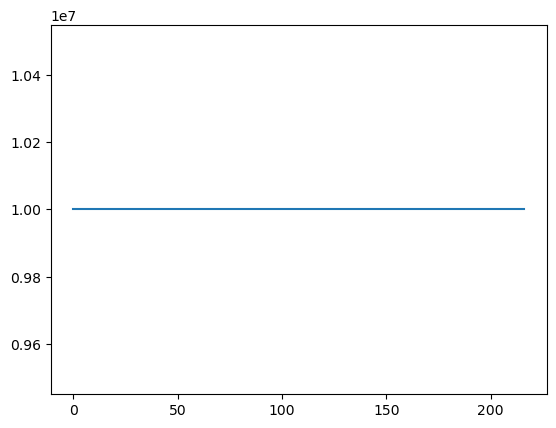

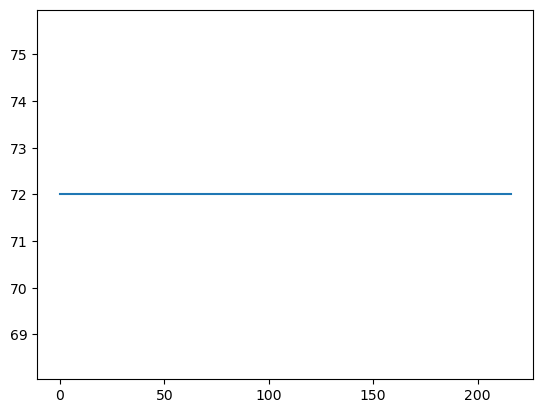

In [90]:
# check the power and threshold

plt.plot(total_data[:,1])
plt.figure()
plt.plot(total_data[:,2])

In [91]:
def shuffle_ndarray(arr, chunk_size=10):
    num_chunks = arr.shape[0] // chunk_size  # 计算块的数量

    # 将数组切片为长度为 chunk_size 的块
    chunks = np.split(arr[:num_chunks*chunk_size], num_chunks)

    # 对块的索引进行洗牌（shuffle）
    shuffled_indices = np.arange(num_chunks)
    np.random.shuffle(shuffled_indices)

    # 根据洗牌后的索引重新排序块
    shuffled_chunks = [chunks[i] for i in shuffled_indices]

    # 将洗牌后的块重新合并为一个数组
    shuffled_arr = np.concatenate(shuffled_chunks)

    return shuffled_arr


if shuffle:

    total_data = shuffle_ndarray(total_data, 50)

In [92]:
# Drop the data 

# Save the array as a CSV file
np.savetxt(f'./Gamma Data/{output_name}', total_data, delimiter=',')
np.savetxt(f'./Processed Data/{output_name}', total_data, delimiter=',')